# Лабораторная работа №7. Морфологический анализ изображений

## Задание № 1 (Базовые морфологические операции)
Базовые морфологические операции. Выбрать произвольное изображение, содержащее дефекты формы (внутренние «дырки» или внешние «выступы») объектов. Используя базовые морфологические операции, полностью убрать или минимизировать дефекты.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import drive


In [2]:
drive.mount('/content/drive')

grayI = cv2.imread('/content/drive/My Drive/car11.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
closeI = cv2.morphologyEx(grayI, cv2.MORPH_CLOSE, kernel)
openI = cv2.morphologyEx(closeI, cv2.MORPH_OPEN, kernel)
# grayI = cv2.morphologyEx(grayI, cv2.MORPH_CLOSE, kernel)

Mounted at /content/drive


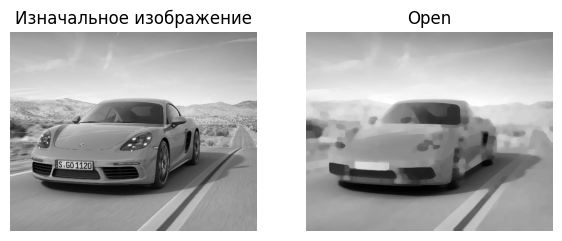

In [3]:
plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
plt.title('Изначальное изображение')
plt.imshow(grayI, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Open')
plt.imshow(openI, cmap='gray')
plt.axis('off')

plt.show()

## Задание № 2 (Разделение объектов)
Разделение объектов. Выбрать произвольное бинарное изображение, содержащее перекрывающиеся объекты. Использовать операции бинарной морфологии для разделения объектов. Выделить контуры объектов

In [4]:
# Загружаем изображение в черно-белом режиме
I = cv2.imread('/content/drive/My Drive/car11.jpg', cv2.IMREAD_GRAYSCALE)

# Применяем бинаризацию изображения с порогом 150
# Черные пиксели становятся белыми, и наоборот
ret, Inew = cv2.threshold(I, 150, 255, cv2.THRESH_BINARY_INV)

# Создаем структурный элемент для морфологических операций
# Эллиптический элемент размером 5x5 пикселей
B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Закрытие изображения для удаления шума и заполнения мелких дырок
BW2 = cv2.morphologyEx(Inew, cv2.MORPH_CLOSE, B, iterations=14,
                       borderType=cv2.BORDER_CONSTANT, borderValue=(0))

# Итеративная дилатация и закрытие для выделения объектов
T = np.zeros_like(Inew)
while cv2.countNonZero(BW2) < BW2.size:
    D = cv2.dilate(BW2, B, borderType=cv2.BORDER_CONSTANT, borderValue=(0))
    C = cv2.morphologyEx(D, cv2.MORPH_CLOSE, B,
                          borderType=cv2.BORDER_CONSTANT, borderValue=(0))
    S = C - D  # Выделение границ объектов
    T = cv2.bitwise_or(S, T)  # Объединение границ в единое изображение
    BW2 = D

# Закрытие изображения с большим количеством итераций
# для удаления шума на границах
T = cv2.morphologyEx(T, cv2.MORPH_CLOSE, B, iterations=14,
                       borderType=cv2.BORDER_CONSTANT, borderValue=(255))

# Удаление границ из исходного изображения
Inew = cv2.bitwise_and(~T, Inew)

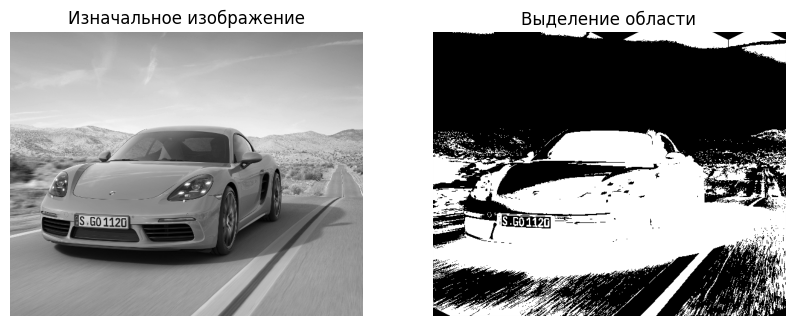

In [5]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Изначальное изображение')
plt.imshow(I, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Выделение области')
plt.imshow(Inew, cmap='gray')
plt.axis('off')

plt.show()

## Задание № 3 (Сегментация)

Выбрать произвольное изображение, содержащее небольшое число локальных минимумов. Выполнить сегментацию изображения по водоразделам.

In [7]:
# Находим приблизительное количество монет с помощью бинаризации Оцу
img = cv2.imread('/content/drive/My Drive/car11.jpg')
gray = cv2.imread('/content/drive/My Drive/car11.jpg', cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Удаление шума
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Определение области определенного фона
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Нахождение области определенного переднего плана
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.6 * dist_transform.max(), 255, 0)

# Нахождение неопределенной области
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

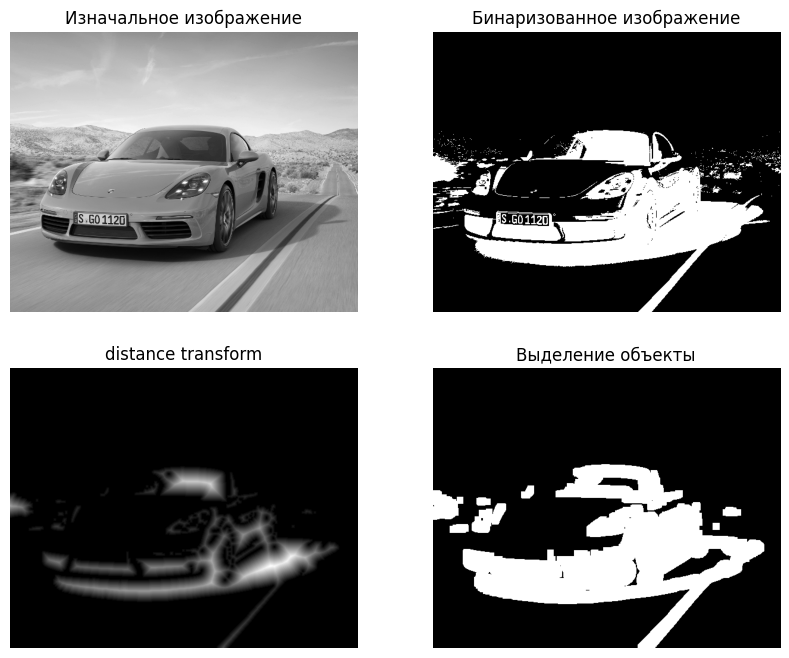

In [8]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Изначальное изображение')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Бинаризованное изображение')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('distance transform')
plt.imshow(dist_transform, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Выделение объекты')
plt.imshow(unknown, cmap='gray')
plt.axis('off')

plt.show()